In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances


file_path = '../songrecommendation/songsDataset1.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)




#data cleaning



# Drop rows where the user ID is 0
df = df[df["'userID'"] != 0]

# Reset the index after dropping rows
df = df.reset_index(drop=True)
# Check for missing values
missing_values = df.isnull()
df.fillna(np.nan, inplace=True)
# Display the modified DataFrame
df.head(10)


,'userID','songID','rating'
0,1,3342,5
1,1,7522,1
2,1,25363,2
3,1,38997,5
4,1,43685,1
5,1,45488,4
6,1,62770,3
7,1,109450,3
8,1,122506,3
9,1,130621,5


In [2]:
df.rename(columns=lambda x: x.replace("'", ""), inplace=True)
df.head(10)

,userID,songID,rating
0,1,3342,5
1,1,7522,1
2,1,25363,2
3,1,38997,5
4,1,43685,1
5,1,45488,4
6,1,62770,3
7,1,109450,3
8,1,122506,3
9,1,130621,5


In [3]:
song_stats = df.groupby('songID').agg({'rating': [np.size, np.mean]})
print(song_stats)


       rating     
         size mean
songID            
319         1  1.0
726         1  3.0
1244        1  1.0
1457        1  2.0
1539        1  5.0
...       ...  ...
134785      1  5.0
135481      2  4.5
135792      1  1.0
136390      1  4.0
136449      1  5.0

[484 rows x 2 columns]


Text(0.5, 0, 'Rating (Out of 5)')

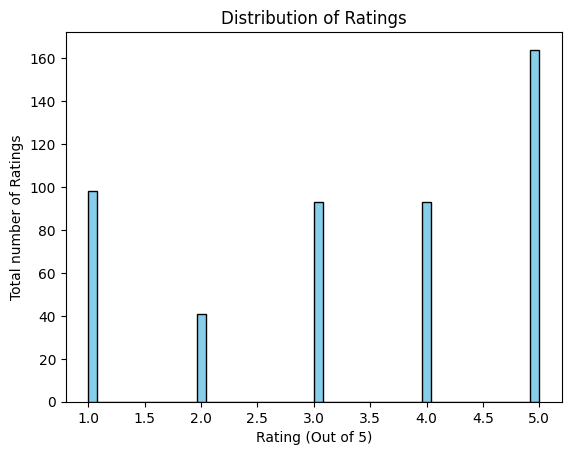

In [4]:


df.rating.plot.hist(bins=50,color='skyblue', edgecolor='black')
plt.title("Distribution of Ratings")
plt.ylabel('Total number of Ratings')
plt.xlabel('Rating (Out of 5)')

In [5]:

ratings_matrix = df.pivot_table(index=['songID'],columns=['userID'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head()

userID,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,10947,10948,10949,10950
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
song_similarity = 1 - pairwise_distances(ratings_matrix.values, metric="cosine" )
np.fill_diagonal( song_similarity, 0 ) 
ratings_matrix = pd.DataFrame( song_similarity )
ratings_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,474,475,476,477,478,479,480,481,482,483
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.780869,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [7]:
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp=319
    inp=df[df['songID']==user_inp].index.tolist()
    inp=inp[0]
    
    df['similarity'] = ratings_matrix.iloc[inp]
    df.columns = ['songID','similarity']
    df.head(2)
    
except:
    print("This song is not in the database!")

This song is not in the database!


In [8]:
print("Recommended movies based on your choice of ",user_inp ,": \n", df.sort_values( ["similarity"], ascending = False )[1:10])

Recommended movies based on your choice of  319 : 
      userID  songID  rating  similarity
472   10949   26572       4         1.0
280      29    1244       1         1.0
60        7   28841       4         1.0
178      18  102798       5         1.0
382      39   27653       1         1.0
388      39  103879       2         1.0
106      11   66629       3         1.0
137      14  105421       3         1.0
323      33   73686       5         0.0


Recommendations based on userId 7 : 
     userID  songID  rating  similarity
60       7   28841       4         1.0
62       7   48211       4         0.0
66       7   87212       4         0.0
68       7  110746       4         0.0
61       7   39671       3         0.0
65       7   78136       3         0.0
69       7  134732       3         0.0
63       7   67674       1         0.0
64       7   74541       1         0.0
67       7   91657       1         0.0


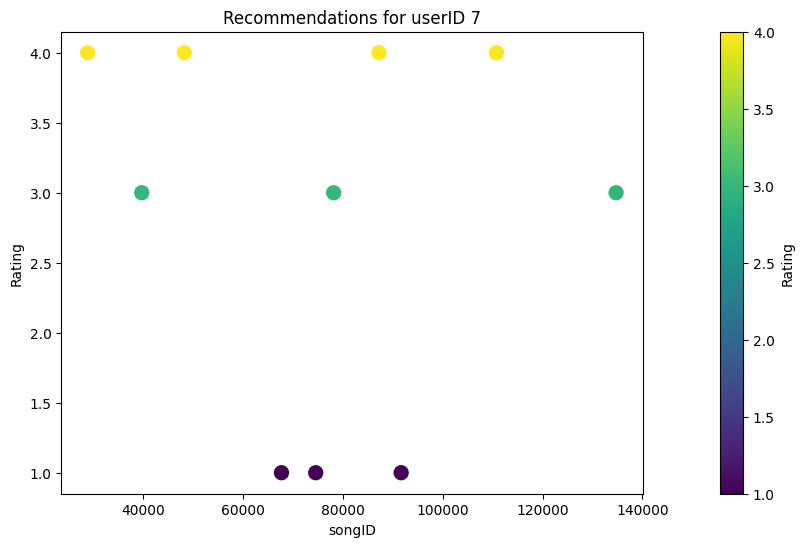

In [9]:
#visualization
user_id_to_visualize = 7
user_recommendations = df[df['userID'] == user_id_to_visualize].sort_values(by='rating', ascending=False).head(10)
print("Recommendations based on userId",user_id_to_visualize,": \n",user_recommendations)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(user_recommendations['songID'], user_recommendations['rating'], c=user_recommendations['rating'], cmap='viridis', s=100)
plt.colorbar(scatter, label='Rating', orientation='vertical', pad=0.1)
plt.title(f'Recommendations for userID {user_id_to_visualize}')
plt.xlabel('songID')
plt.ylabel('Rating')
plt.show()